## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [274]:
# Your code here - remember to use markdown cells for comments as well!

import pandas as pd
import numpy as np

In [275]:
csv_path = ('data/Aviation_Data.csv')
df =  pd.read_csv(csv_path)

print (df.head())

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude  Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
2    Saltville, VA  United States  36.922223 -81.878056          NaN   
3       EUREKA, CA  United States        NaN        NaN          NaN   
4       Canton, OH  United States        NaN        NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1         

C:\Users\USER\AppData\Local\Temp\ipykernel_18748\1776509017.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv(csv_path)


In [276]:
print(df.describe)

<bound method NDFrame.describe of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
90343  20221227106491           Accident      ERA23LA093  2022-12-26   
90344  20221227106494           Accident      ERA23LA095  2022-12-26   
90345  20221227106497           Accident      WPR23LA075  2022-12-26   
90346  20221227106498           Accident      WPR23LA076  2022-12-26   
90347  20221230106513           Accident      ERA23LA097  2022-12-29   

              Location        Country   Latitude  Longitude Airport.Code  \
0      MOOSE CREEK, ID  U

In [277]:
print(df.isnull().sum())



Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

In [278]:
list_columns = ['Event.Date', 'Location', 'Country', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Make', 'Total.Fatal.Injuries'
, 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Report.Status']

In [279]:
df = df[list_columns].copy()

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              88889 non-null  object 
 1   Location                88837 non-null  object 
 2   Country                 88663 non-null  object 
 3   Injury.Severity         87889 non-null  object 
 4   Aircraft.damage         85695 non-null  object 
 5   Aircraft.Category       32287 non-null  object 
 6   Make                    88826 non-null  object 
 7   Total.Fatal.Injuries    77488 non-null  float64
 8   Total.Serious.Injuries  76379 non-null  float64
 9   Total.Minor.Injuries    76956 non-null  float64
 10  Total.Uninjured         82977 non-null  float64
 11  Weather.Condition       84397 non-null  object 
 12  Report.Status           82505 non-null  object 
dtypes: float64(4), object(9)
memory usage: 9.0+ MB


In [281]:
#data cleaning : here we remove rows with possible duplicate rows
df.drop_duplicates(inplace=True)

In [282]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [283]:
df.isna().sum()

Event.Date                    1
Location                     53
Country                     226
Injury.Severity             998
Aircraft.damage            3181
Aircraft.Category         56446
Make                         64
Total.Fatal.Injuries      11380
Total.Serious.Injuries    12477
Total.Minor.Injuries      11899
Total.Uninjured            5896
Weather.Condition          4487
Report.Status              6378
dtype: int64

In [284]:
df.dropna(subset='Event.Date', inplace = True)

In [285]:
df['Event.Date'].isna().sum()

0

In [286]:
delete_columns = ['Location', 'Country', 'Injury.Severity', 'Make']

In [287]:
df.dropna(subset = delete_columns, inplace = True)

In [288]:
df.isna().sum()

Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage            2645
Aircraft.Category         56042
Make                          0
Total.Fatal.Injuries      11348
Total.Serious.Injuries    12439
Total.Minor.Injuries      11859
Total.Uninjured            5865
Weather.Condition          3543
Report.Status              5451
dtype: int64

In [289]:
mode_fatal = df['Total.Fatal.Injuries'].mode()

mode_serious = df['Total.Serious.Injuries'].mode()

mode_minor = df['Total.Minor.Injuries'].mode()

mode_uninjured = df['Total.Uninjured'].mode()

In [290]:
df['Total.Fatal.Injuries'].fillna(mode_fatal[0], inplace = True)

df['Total.Serious.Injuries'].fillna(mode_serious[0], inplace = True)

df['Total.Minor.Injuries'].fillna(mode_minor[0], inplace = True)

df['Total.Uninjured'].fillna(mode_uninjured[0], inplace = True)

In [291]:
df.isna().sum()

Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage            2645
Aircraft.Category         56042
Make                          0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          3543
Report.Status              5451
dtype: int64

In [292]:
df.dropna(subset = 'Aircraft.damage', inplace = True)

In [293]:
df.isna().sum()

Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         54423
Make                          0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          2870
Report.Status              4869
dtype: int64

In [294]:
df['Weather.Condition'].value_counts()

Weather.Condition
VMC    75184
IMC     5742
UNK      759
Unk      194
Name: count, dtype: int64

In [295]:
mode_weather = df['Weather.Condition'].mode()

df['Weather.Condition'].fillna(mode_weather[0], inplace = True)

In [296]:
df.isna().sum()

Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         54423
Make                          0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Report.Status              4869
dtype: int64

In [297]:
df['Report.Status'].value_counts()

Report.Status
Probable Cause                                                                                                                                                                                                                                                                                                                             59918
Foreign                                                                                                                                                                                                                                                                                                                                     1765
Factual                                                                                                                                                                                                                                                                                                                 

In [298]:
mode_reportstatus = df['Report.Status'].mode()

df['Report.Status'].fillna(mode_reportstatus[0], inplace = True)

In [299]:
df.isna().sum()

Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         54423
Make                          0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Report.Status                 0
dtype: int64

In [300]:
df = df[df['Aircraft.Category']== 'Airplane'].copy()

In [301]:
df.isna().sum()

Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
dtype: int64

In [302]:
df['Make'].value_counts()

Make
CESSNA            4724
Cessna            3562
PIPER             2756
Piper             1891
BEECH              990
                  ... 
Chang                1
Jurmu                1
FRANKE HARRY C       1
COMBS EARL W         1
ORLICAN S R O        1
Name: count, Length: 3840, dtype: int64

In [303]:
df['Make'] = df['Make'].str.lower()

In [304]:
df['Make'].value_counts()

Make
cessna             8286
piper              4647
beech              1656
boeing              556
mooney              412
                   ... 
dayton                1
glines                1
rammel thomas w       1
hemmer                1
orlican s r o         1
Name: count, Length: 3508, dtype: int64

In [305]:
df['Weather.Condition'].value_counts()

Weather.Condition
VMC    24283
IMC     1332
Unk      158
UNK      132
Name: count, dtype: int64

In [306]:
df['Weather.Condition'] = df['Weather.Condition'].str.upper()

In [307]:
df['Weather.Condition'].value_counts()

Weather.Condition
VMC    24283
IMC     1332
UNK      290
Name: count, dtype: int64

In [308]:
df.reset_index(inplace = True, drop = True)

In [309]:
df.to_csv('C:\Docs\Flatirons\Cleaned_Aviation_Data.csv', index = False)

In [310]:
import matplotlib.pyplot as plt
import seaborn as sns

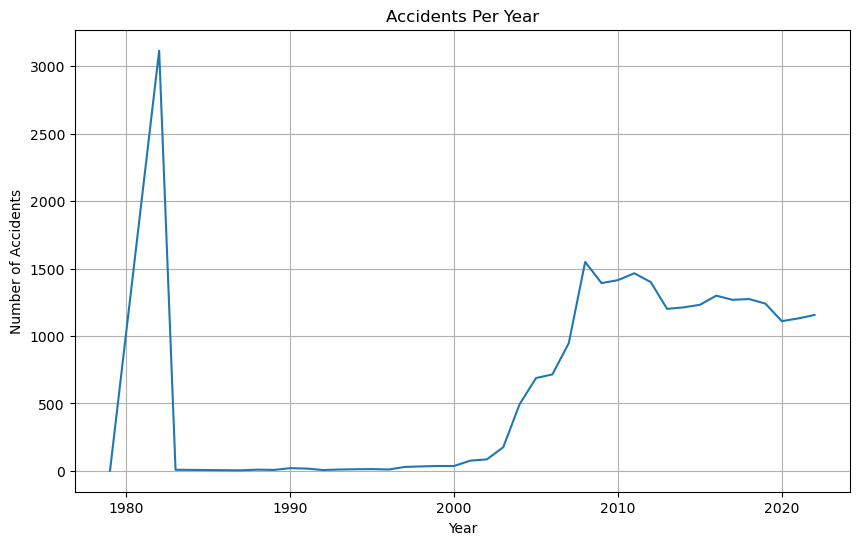

In [311]:
# Accident trends over time
plt.figure(figsize=(10, 6))
accidents_per_year.plot(kind='line')
plt.title('Accidents Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

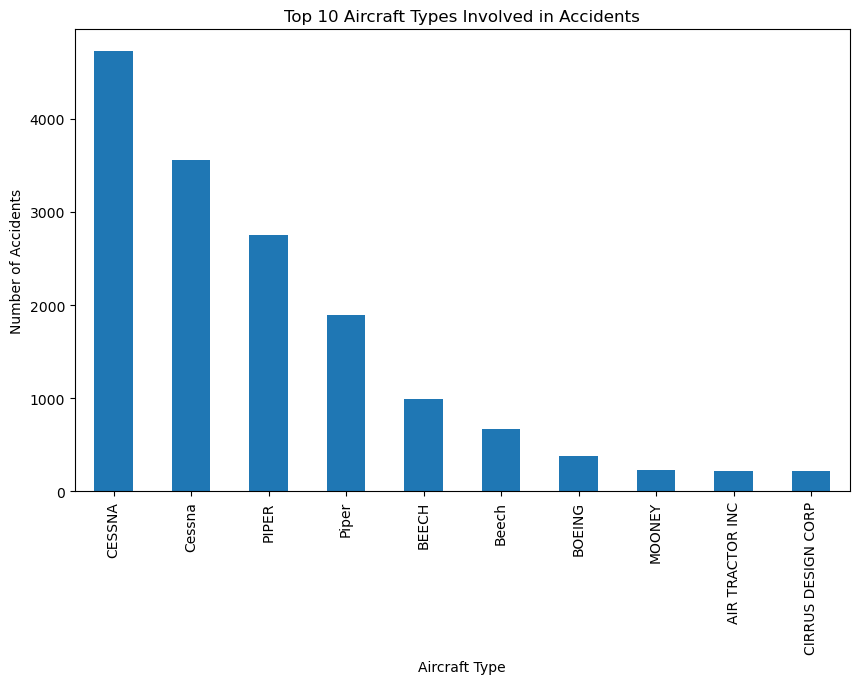

In [312]:
# Types of aircraft involved in accidents
plt.figure(figsize=(10, 6))
aircraft_type.head(10).plot(kind='bar')
plt.title('Top 10 Aircraft Types Involved in Accidents')
plt.xlabel('Aircraft Type')
plt.ylabel('Number of Accidents')
plt.show()

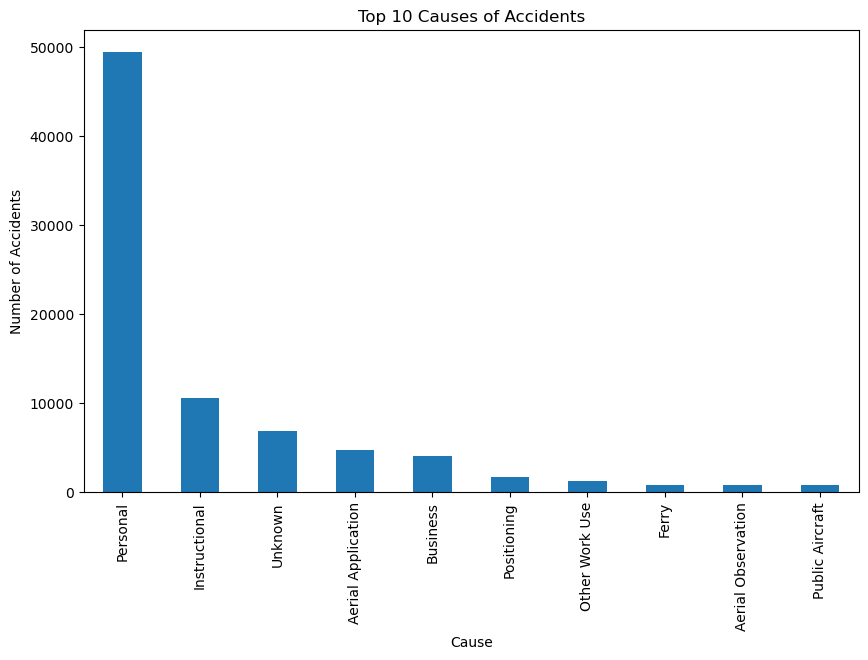

In [313]:
# Causes of accidents
plt.figure(figsize=(10, 6))
purpose_of_flight.head(10).plot(kind='bar')
plt.title('Top 10 Causes of Accidents')
plt.xlabel('Cause')
plt.ylabel('Number of Accidents')
plt.show()